## <font color='Teal'>**Тема 16. Хеш-таблицы**

Хеш-таблицы представляют собой ассоциативные структуры данных, позволяющие эффективно сопоставлять ключи и значения. Основная идея заключается в использовании хеш-функции, преобразующей ключ в индекс массива, где и размещается соответствующее значение. Такая организация обеспечивает высокую скорость выполнения основных операций, что делает хеш-таблицы незаменимыми в задачах, требующих быстрого доступа к данным.

В рамках темы последовательно рассматриваются основные механизмы устройства хеш-таблиц: построение и выбор хеш-функций, типы коллизий и способы их разрешения, особенности загрузки таблицы и влияния коэффициента заполнения. Анализируются методы цепочек и открытой адресации, включая линейное, квадратичное и двойное пробирование, а также обсуждается идея универсального хеширования. Примеры на Python иллюстрируют не только принципы работы, но и практические аспекты реализации, дополненные визуализацией и анализом поведения таблицы в различных сценариях.

### <font color='Teal'>Ассоциативный массив. Таблица с прямой адресацией

**Ассоциативный массив** представляет собой структуру, в которой каждому уникальному ключу сопоставляется определённое значение, образующее с ним пару вида «ключ–значение». Такой подход позволяет обращаться к данным не по позиционному индексу, как в обычном списке, а по ключу, который может быть строкой, числом, кортежем и даже объектом, если он допускает <u>хеширование</u>. Подобная структура используется в языке Python под именем `dict` и является универсальным средством хранения разреженных или именованных данных, где необходимость в последовательном доступе по индексам заменяется обращением по смысловым меткам.

Ключевая особенность словаря в Python заключается в том, что операции вставки, поиска и удаления осуществляются за амортизированное постоянное время. Это становится возможным благодаря внутренней реализации словаря в виде хеш-таблицы. Каждое значение ключа преобразуется при помощи хеш-функции в индекс, по которому осуществляется доступ к ячейке памяти. Если возникает коллизия, то есть несколько различных ключей имеют одинаковое хеш-значение, применяется специальная стратегия разрешения, позволяющая корректно различать и обрабатывать такие случаи.

В языке Python тип `dict` поддерживает весь необходимый набор операций, включая создание пустого словаря, добавление и извлечение элементов, проверку наличия ключа, удаление по ключу, а также получение всех ключей или значений. Пример базового использования словаря:

In [ ]:
d1 = dict()

In [ ]:
d1['abc'] = 79

In [ ]:
v = d1['abc']
print(v)

79


In [ ]:
b = 'xyz' in d1
print(b)

False


In [ ]:
it = iter(d1)
print(list(it))

['abc']


In [ ]:
l = len(d1)
print(l)

1


In [ ]:
del d1['abc']

Этот пример демонстрирует основные операции: создание словаря, добавление пары `'abc': 79`, извлечение значения по ключу, проверка присутствия ключа `'xyz'` (в данном случае возвращается логическое значение `False`), получение списка всех ключей и определение размера структуры. В завершение выполняется удаление элемента по ключу.

Такая последовательность показывает, насколько удобен и гибок интерфейс словаря. Однако за простотой операций скрывается сложная внутренняя реализация, связанная с хешированием и размещением элементов в памяти. Чтобы перейти к пониманию этой реализации, важно рассмотреть подходы к организации таблиц с прямой адресацией и хеш-таблиц, которые обеспечивают базовую структуру для ассоциативных массивов.

Показательный способ хранения пар ключ–значение — таблица с прямой адресацией. Такая структура может использоваться в ситуациях, когда количество допустимых ключей ограничено, и каждому ключу можно сопоставить отдельную ячейку в массиве. В этом случае обращение по ключу сводится к индексированию массива, что обеспечивает доступ к элементу за постоянное время.

Допустим, требуется хранить значения, индексируемые ключами из диапазона $\{0, 1, 2, \ldots, m-1\}$, где $m$ — некоторое небольшое целое число. В этом случае можно выделить массив длины $m$, где каждый элемент напрямую соответствует одному значению ключа. Преимущество такого подхода — в моментальном обращении по индексу, без поиска или перебора. Однако он требует, чтобы все ключи можно было интерпретировать как целые числа, подходящие в качестве индексов массива.

Чтобы расширить этот подход на произвольные объекты, например, строки, необходимо ввести функцию отображения, то есть преобразователь ключа в допустимый индекс. Рассмотрим простую функцию `to_key`, преобразующую символ в число по его позиции в английском алфавите:

In [ ]:
def to_key(s=None):
    if s is None:
        s = 'z'
    return ord(s) - ord('a')

После выполнения следующих вызовов функции будут выведены значения, соответствующие индексам символов:

In [ ]:
to_key('a')

0

In [ ]:
to_key('c')

2

In [ ]:
to_key()

25

Если же ключи представлены не одиночными символами, а последовательностями символов, то описанной выше функции недостаточно. В этом случае требуется иное преобразование, позволяющее каждой строке сопоставить уникальное числовое значение. Одним из подходов является использование позиционной системы счисления: каждый символ строки трактуется как цифра в системе с основанием 26, соответствующей количеству допустимых символов алфавита. Функция, реализующая такое отображение:

In [ ]:
def seq_to_key(seq):
    res = 0
    n = to_key()
    for i, el in enumerate(seq):
        assert 0 <= to_key(el) <= n
        res += to_key(el) * n ** i
    return res

Это определение позволяет рассматривать строку как число в позиционной системе счисления с основанием, равным количеству допустимых символов, в данном случае $n = 26$.

In [ ]:
seq_to_key('a')

0

In [ ]:
seq_to_key('z')

25

In [ ]:
seq_to_key('bb')

26

In [ ]:
seq_to_key('abc')

1275

In [ ]:
seq_to_key('aa') # проблема!

0

Такое отображение не является однозначным: строка 'aa' получает тот же числовой код, что и 'a', поскольку ведущие нули не влияют на итоговое значение. В условиях прямой адресации и хеширования это недопустимо, так как приводит к перезаписи значений и нарушению целостности структуры.

Чтобы устранить эту проблему, функция `to_key` изменяется: теперь она возвращает не значение от `0` до `25`, а от `1` до `26`. Это позволяет избежать нулей и гарантирует, что, например, `'aa'` и `'a'` будут кодироваться по-разному:

In [ ]:
def to_key(s=None):
    if s is None:
        s = 'z'
    return ord(s) - ord('a') + 1

После этой корректировки становится возможным различать строки, даже если они содержат ведущие символы `'a'`. Попробуем вызвать функцию `seq_to_key` с обновлённой версией `to_key` для разных строк:

In [ ]:
[seq_to_key(x) for x in ['', 'a', 'z', 'aa', 'ab', 'zz', 'aaa']]

[0, 1, 26, 27, 53, 702, 703]

В результате каждая строка получает уникальное положительное числовое представление. Такое отображение исключает коллизии между строками различной длины и содержимого, включая те, которые ранее приводили к одинаковому значению, например, `'a'` и `'aa'`. Это обеспечивает корректное поведение при использовании функции в качестве преобразователя ключей. Подобный подход полезен, когда пространство ключей можно жёстко ограничить и контролировать. Это характерно, например, для систем, работающих с короткими идентификаторами фиксированного формата, таблиц переходов в конечных автоматах или в задачах, где все допустимые строки известны заранее и их число сравнительно невелико.

Рассмотрим реализацию ассоциативного массива, в котором в качестве ключей используются строки фиксированной длины, составленные из латинских букв от `'a'` до `'z'`. Для этого создаётся структура `DirectStrTable`, позволяющая выполнять прямое отображение строк в индексы массива и обратно, обеспечивая тем самым эффективное хранение и быстрый доступ к значениям по строковым ключам.

```python
class DirectStrTable:
    def __init__(self, str_len):
        self._str_len = str_len
        self._n = self._to_key()
        self._none = object()
        total = 0
        for i in range(self._str_len + 1):
            total *= self._n
            total += 1
        self._table = [self._none] * total
        self._len = 0
```

Конструктор принимает один аргумент — максимальную длину строки, которая может использоваться в качестве ключа. Внутри конструктора вычисляется общее количество возможных строк (с учётом всех длин от 0 до `str_len`) и создаётся список нужной длины. Все ячейки инициализируются специальным значением `_none`, служащим индикатором пустоты.

```python
    def _to_key(self, s=None):
        if s is None:
            s = 'z'
        return ord(s) - ord('a') + 1

    def _from_key(self, k):
        return chr(k + ord('a') - 1)
```

Метод `_to_key` преобразует символ в число от `1` до `26`, соответствующее его позиции в алфавите. Метод `_from_key` выполняет обратное преобразование, превращая число обратно в символ.

```python
    def _str_to_key(self, seq):
        res = 0
        assert len(seq) <= self._str_len
        for i, el in enumerate(seq):
            assert 0 < self._to_key(el) <= self._n
            res += self._to_key(el) * self._n ** i
        return res
```

Метод `_str_to_key` отображает строку в уникальный числовой индекс. Он работает аналогично системе счисления с основанием `n`, где `n` — количество допустимых символов. Каждый символ рассматривается как цифра, и итоговое значение формируется по позиционной формуле. Таким образом, каждая строка получает собственный ключ в пределах допустимого диапазона.

```python
    def _key_to_str(self, k):
        s = ''
        while k > 0:
            k, m = divmod(k, self._n)
            if m == 0:
                s += self._from_key(self._n)
                k -= 1
            else:
                s += self._from_key(m)
        return s
```

Метод `_key_to_str` позволяет восстановить строку по её числовому представлению. Он реализует обратное преобразование, извлекая символы из индекса в соответствии с основанием `n`.

Следующие методы реализуют интерфейс словаря, используя описанное выше прямое отображение строк в индексы:

```python
    def __len__(self):
        return self._len

    def __getitem__(self, str_key):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            raise KeyError(f'Key Error: {repr(str_key)}')
        else:
            return self._table[k]

    def __contains__(self, str_key):
        k = self._str_to_key(str_key)
        return self._table[k] is not self._none
```

Методы `__len__`, `__getitem__` и `__contains__` реализуют стандартные операции: получение количества элементов, извлечение значения по ключу и проверку на наличие ключа в таблице. При отсутствии значения в соответствующей ячейке возбуждается исключение `KeyError`.

```python
    def __setitem__(self, str_key, val):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            self._table[k] = val
            self._len += 1
        else:
            self._table[k] = val

    def __delitem__(self, str_key):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            raise KeyError(f'Key Error: {repr(str_key)}')
        else:
            self._table[k] = self._none
            self._len -= 1
```

Методы `__setitem__` и `__delitem__` обеспечивают вставку и удаление значений. Если ключ ранее не использовался, то длина таблицы увеличивается. Удаление сбрасывает значение в `_none` и уменьшает счётчик.

```python
    def _raw_iter(self):
        for rk, val in enumerate(self._table):
            if val is not self._none:
                yield rk, val

    def __iter__(self):
        for rk, val in self._raw_iter():
            yield self._key_to_str(rk)

    def items(self):
        for rk, val in self._raw_iter():
            yield self._key_to_str(rk), val

    def values(self):
        for val in self._table:
            if val is not self._none:
                yield val
```

Методы `__iter__`, `items` и `values` предоставляют удобные способы обхода таблицы: по ключам, по парам ключ–значение и по значениям. Используется внутренний генератор `_raw_iter`, перебирающий все непустые элементы таблицы.

```python
    def stat(self):
        return (f'Хранится элементов: {self._len}\n'
                f'Размер таблицы: {len(self._table)}\n'
                f'Доля используемых элементов таблицы: '
                f'{self._len / len(self._table):.5f}')
```

Метод `stat` выводит краткую статистику о состоянии таблицы: общее число сохранённых элементов, полный размер массива и долю занятых ячеек. Это позволяет оценить эффективность распределения данных и при необходимости скорректировать параметры хранения.

Полный код класса `DirectStrTable`, реализующего прямую адресацию строк фиксированной длины, приведён ниже. Этот фрагмент демонстрирует все аспекты работы: преобразование строк в числовые ключи и обратно, хранение данных в массиве, доступ по ключу, итерацию и получение статистики.

In [ ]:
class DirectStrTable:
    def __init__(self, str_len):
        self._str_len = str_len
        self._n = self._to_key()
        self._none = object()
        total = 0
        for i in range(self._str_len + 1):
            total *= self._n
            total += 1
        self._table = [self._none] * total
        self._len = 0

    def _to_key(self, s=None):
        if s is None:
            s = 'z'
        return ord(s) - ord('a') + 1

    def _from_key(self, k):
        return chr(k + ord('a') - 1)

    def _str_to_key(self, seq):
        res = 0
        assert len(seq) <= self._str_len
        for i, el in enumerate(seq):
            assert 0 < self._to_key(el) <= self._n
            res += self._to_key(el) * self._n ** i
        return res

    def _key_to_str(self, k):
        s = ''
        while k > 0:
            k, m = divmod(k, self._n)
            if m == 0:
                s += self._from_key(self._n)
                k -= 1
            else:
                s += self._from_key(m)
        return s

    def __len__(self):
        return self._len

    def __getitem__(self, str_key):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            raise KeyError(f'Key Error: {repr(str_key)}')
        else:
            return self._table[k]

    def __contains__(self, str_key):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            return False
        else:
            return True

    def __setitem__(self, str_key, val):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            self._table[k] = val
            self._len += 1
        else:
            self._table[k] = val

    def __delitem__(self, str_key):
        k = self._str_to_key(str_key)
        if self._table[k] is self._none:
            raise KeyError(f'Key Error: {repr(str_key)}')
        else:
            self._table[k] = self._none
            self._len -= 1

    def _raw_iter(self):
        for rk, val in enumerate(self._table):
            if val is not self._none:
                yield rk, val

    def __iter__(self):
        for rk, val in self._raw_iter():
            yield self._key_to_str(rk)

    def items(self):
        for rk, val in self._raw_iter():
            yield self._key_to_str(rk), val

    def values(self):
        for val in self._table:
            if val is not self._none:
                yield val

    def stat(self):
        return (f'Хранится элементов: {self._len}\n'
                f'Размер таблицы: {len(self._table)}\n'
                f'Доля используемых элементов таблицы: '
                f'{self._len / len(self._table):.5f}')

Чтобы убедиться в работоспособности описанного механизма, рассмотрим последовательность операций над объектом класса `DirectStrTable`, отражающую типичные действия со структурой прямой адресации.

Создаётся объект `dst1 = DirectStrTable(3)`, что означает возможность хранения строк длиной не более трёх символов. Изначально таблица пуста, поэтому `len(dst1)` возвращает `0`.

In [ ]:
dst1 = DirectStrTable(3)
len(dst1)

0

Добавляется первая пара ключ–значение: строке `'ab'` сопоставляется число `11`. После этого количество элементов увеличивается, и результат вызова `len(dst1)` становится равен `1`. Извлечение значения по ключу `'ab'` подтверждает корректность вставки.

In [ ]:
dst1['ab'] = 11
len(dst1)

1

In [ ]:
dst1['ab']

11

Выполняется проверка на наличие ключей `'ab'` и `'a'` в таблице. Результат `True` для `'ab'` и `False` для `'a'` показывает, что только первый ключ был явно добавлен.

In [ ]:
'ab' in dst1

True

In [ ]:
'a' in dst1

False

Добавляются ещё две строки: `'abc'` со значением `7` и `'zz'` со значением `77`. После каждой операции можно убедиться в изменении количества хранимых пар. Затем ключ `'zz'` удаляется из таблицы, и общее число элементов снова уменьшается.

In [ ]:
dst1['abc'] = 7
dst1['zz'] = 77
len(dst1)

3

In [ ]:
del dst1['zz']
len(dst1)

2

В таблицу поочерёдно добавляются несколько новых строк: `'x'`, `'z'`, `'aa'`, `'ab'`, `'zz'`, `'aaa'`, `'abc'`, `'zzz'`. Каждая строка получает своё числовое значение. После вставок вызывается `len(dst1)`, чтобы получить актуальное количество элементов, и `list(dst1)`, чтобы увидеть все строковые ключи, хранящиеся в таблице.

In [ ]:
dst1['x'] = 1
dst1['z'] = 5
dst1['aa'] = 6
dst1['ab'] = 7
dst1['zz'] = 8
dst1['aaa'] = 9

In [ ]:
len(dst1)

7

In [ ]:
list(dst1)

['x', 'z', 'aa', 'ab', 'zz', 'aaa', 'abc']

Получить доступ к внутреннему представлению таблицы можно с помощью метода `_raw_iter()`, который возвращает пары числовых ключей и значений. Это полезно для анализа распределения строк по массиву.

In [ ]:
list(dst1._raw_iter())

[(24, 1), (26, 5), (27, 6), (53, 7), (702, 8), (703, 9), (2081, 7)]

Чтобы вернуть пары ключ–значение в обычном строковом виде, используется метод `items()`. Метод `values()` позволяет получить только значения. Оба метода демонстрируют интерфейс, аналогичный встроенному словарю.

In [ ]:
list(dst1.items())

[('x', 1), ('z', 5), ('aa', 6), ('ab', 7), ('zz', 8), ('aaa', 9), ('abc', 7)]

In [ ]:
list(dst1.values())

[1, 5, 6, 7, 8, 9, 7]

Для сравнения создаётся обычный словарь с двумя парами. Он также преобразуется в список ключей и значений, чтобы показать схожесть в использовании.

In [ ]:
d1 = dict([('ab', 11), ('abc', 7)])

In [ ]:
list(d1)

['ab', 'abc']

In [ ]:
list(d1.values())

[11, 7]

И наконец, метод `stat()` предоставляет сведения о внутреннем устройстве таблицы: количество элементов, размер резервированного массива и долю занятых ячеек. Этот вывод помогает оценить эффективность использования памяти.

In [ ]:
print(dst1.stat())

Хранится элементов: 7
Размер таблицы: 18279
Доля используемых элементов таблицы: 0.00038


В данном случае размер таблицы равен `18279`, поскольку при максимальной длине строки `3` и алфавите из `26` символов общее число возможных строк вычисляется как $26^1 + 26^2 + 26^3 = 26 + 676 + 17576 = 18278$, а дополнительная ячейка резервируется под пустую строку, что даёт $18278 + 1 = 18279$; при этом фактически добавлено только `7` элементов, и отношение числа занятых ячеек к размеру таблицы составляет $7 / 18279 \approx 0.00038$, то есть заполнено менее одной десятитысячной части доступного пространства.

Прямая адресация демонстрирует высокую производительность, поскольку каждому допустимому значению ключа сопоставляется уникальная позиция в таблице. Это обеспечивает операции вставки, поиска и удаления за постоянное время. Однако такая эффективность достигается ценой значительного объёма памяти, который требуется для поддержки всего пространства ключей, независимо от того, сколько значений в нём фактически используется.

Главная трудность заключается в том, что для корректной работы таблицы необходимо заранее зарезервировать память под все возможные комбинации строк фиксированной длины. При использовании алфавита из `26` символов и максимальной длине строки, равной `3`, требуется выделить `18279` ячеек. При этом если в таблицу будет занесено всего несколько десятков или даже сотен строк, подавляющее большинство ячеек останется пустым. Это приводит к резкому снижению плотности хранения и неэффективному использованию памяти, особенно при масштабировании на более длинные строки или расширении допустимого алфавита.

Такой дисбаланс между числом потенциальных и реально используемых ключей делает прямую адресацию непрактичной в обобщённой постановке задачи. Даже если производительность операций остаётся высокой, объём памяти, необходимый для поддержки таблицы, может значительно превысить доступные ресурсы системы. Особенно остро это проявляется при работе с ограниченными устройствами или при необходимости обработки больших наборов данных.

Несмотря на издержки, таблицы с прямой адресацией остаются полезным инструментом в задачах с небольшим и строго ограниченным пространством ключей, где важна максимальная скорость доступа и отсутствуют жёсткие ограничения по памяти. Однако в большинстве практических случаев требуется более универсальный механизм, который сочетает эффективность и гибкость. Таким решением становятся хеш-таблицы.

### <font color='Teal'>Хеш-таблица и хеш-функция

**Хеш-таблица** представляет собой эффективную структуру данных для реализации словарей. В отличие от связанного списка, в котором время поиска элемента может достигать линейного в худшем случае, то есть $O(n)$, хеш-таблица при определённых условиях обеспечивает амортизированное время доступа $O(1)$. На практике хеширование оказывается крайне результативным, особенно при наличии математических допущений, гарантирующих равномерное распределение ключей.

По своей сути хеш-таблица является обобщением массива. Когда множество всех возможных ключей велико, а реально используемых ключей значительно меньше, применение обычного массива с прямой адресацией становится крайне неэффективным. В отличие от него, хеш-таблица использует массив меньшего размера, пропорциональный количеству фактически хранимых элементов. Индекс ячейки в массиве вычисляется не напрямую по ключу, а на основе его преобразования специальной функцией — **хеш-функцией**. Таким образом, хеш-таблица опирается на концепцию отображения ключа $k$ в целочисленный **хеш-адрес** $h(k)$, который и используется в качестве индекса в массиве.

Если обозначить множество допустимых ключей через $U$, а массив хеш-таблицы — как $T[0, \ldots, m - 1]$, где $m$ — размер таблицы, то хеш-функция $h$ задаёт отображение:

$$
h\colon U \to \{0, 1, \ldots, m - 1\}.
$$

Говорят, что элемент с ключом $k$ ***хешируется*** в ячейку с индексом $h(k)$, и результат вычисления $h(k)$ называется ***хеш-значением*** ключа $k$.

Хеш-таблица содержит ***слоты*** (или ***ячейки***), каждая из которых может либо быть пустой, либо содержать пару ключ–значение. В Python такая структура обычно реализуется как список, заполненный значениями `None` или их заменителями, если возникает необходимость хранить и `None`.

На этапе инициализации все ячейки хеш-таблицы считаются пустыми. В случае прямой адресации, как уже рассматривалось ранее, элемент с ключом $k$ помещается в ячейку с индексом $k$. При хешировании же элемент размещается в ячейке с индексом $h(k)$, где хеш-функция $h$ служит преобразователем ключа в допустимый индекс таблицы.

Рассмотрим конкретный пример: хеш-таблица имеет размер $m = 11$, а в качестве хеш-функции используется взятие остатка от деления ключа $k$ на $11$:

$$
h(k) = k \bmod 11.
$$

Таким образом, каждому целому ключу $k$ сопоставляется индекс таблицы, равный остатку от деления $k$ на $11$, то есть $k \mapsto k \bmod 11$. На рис. 1 представлена хеш-таблица, содержащая $11$ слотов, каждый из которых проинициализирован значением `None`.

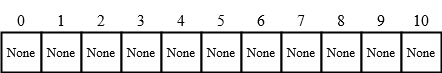

*Рисунок 1 — Пустая хеш-таблица размером 11, подготовленная к вставке элементов*

Для наглядной демонстрации работы хеш-функции определим функцию `h(k)`, которая принимает на вход целое значение `k` и возвращает остаток от деления этого значения на $11$:

In [ ]:
def h(k):
    return k % 11

Затем задаётся список ключей `keys1`, содержащий значения `[54, 26, 93, 17, 77, 31]`. С помощью генератора списка для каждого значения `k` из списка `keys1` вызывается хеш-функция `h(k)`:

In [ ]:
keys1 = [54, 26, 93, 17, 77, 31]

In [ ]:
[h(k) for k in keys1]

[10, 4, 5, 6, 0, 9]

Каждое из этих значений указывает на индекс в хеш-таблице, в который должен быть помещён соответствующий ключ. Это позволяет распределить элементы по таблице согласно их хеш-значениям (рис. 2).

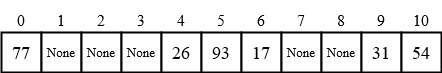

*Рисунок 2 — Хеш-таблица после вставки шести элементов*

Однако при построении хеш-таблиц возникает принципиальная проблема — возможность возникновения ***коллизий***. Коллизия возникает в том случае, когда два различных ключа получают одинаковое хеш-значение и, следовательно, должны быть помещены в одну и ту же ячейку.

Приведём пример. Пусть имеются два ключа: $12$ и $23$. Используя ту же хеш-функцию $h(k) = k \bmod 11$, получим:

$$
h(12) = 1, \quad h(23) = 1.
$$

Оба ключа хешируются в ячейку с индексом $1$, и возникает коллизия.

Это происходит потому, что хеш-функция является детерминированной: для одного и того же значения ключа она всегда возвращает одно и то же хеш-значение. Таким образом, если количество возможных ключей (множество $U$) больше, чем количество доступных ячеек в таблице (размер $m$), то, согласно <u>принципу Дирихле</u>, обязательно найдутся по меньшей мере два различных ключа $k_1$ и $k_2$, для которых $h(k_1) = h(k_2)$. Следовательно, полностью избежать коллизий невозможно в принципе.

Существуют два основных подхода к решению этой проблемы. Первый заключается в выборе такой хеш-функции, которая минимизирует вероятность возникновения коллизий. Это достигается путём использования более сложных или приближённых к случайным функций отображения.

Второй подход связан с разработкой и применением алгоритмов разрешения коллизий. Один из таких алгоритмов — <u>метод цепочек</u>, при котором в каждой ячейке таблицы хранится список всех элементов, хешированных в неё. Это позволяет сохранить несколько ключей с одинаковым хеш-значением без потери информации.

Для обеспечения минимального количества коллизий хеш-функция должна приближённо удовлетворять <u>предположению простого равномерного хеширования</u>. Это означает, что для каждого ключа из допустимого множества $U$ хеш-функция должна равновероятно распределять его в одну из $m$ ячеек хеш-таблицы, независимо от значений других ключей. Другими словами, независимо от того, какие именно ключи вставляются в таблицу, хеш-функция должна стремиться к тому, чтобы избежать их скучивания в одних и тех же слотах и равномерно распределять по всей таблице.

Однако на практике выполнение этого условия не всегда возможно проверить. Во-первых, часто неизвестно распределение ключей, которые будут использоваться в реальной задаче. Во-вторых, даже если оно известно, хеш-функция должна быть устойчива к различным закономерностям в данных и не допускать ситуаций, когда определённый класс ключей систематически попадает в один и тот же диапазон хеш-значений. Это актуально при работе с автоматически сгенерированными или пользовательскими данными, в которых может наблюдаться высокая степень регулярности.

В связи с этим при построении хеш-функции важным является её <u>невосприимчивость к структуре исходных данных</u>. Желательно, чтобы даже небольшие изменения в значении ключа приводили к значительным изменениям в хеш-значении. Такое поведение напоминает свойство [лавинного эффекта](https://ru.wikipedia.org/wiki/%D0%9B%D0%B0%D0%B2%D0%B8%D0%BD%D0%BD%D1%8B%D0%B9_%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82) в криптографических хешах: небольшое изменение на входе полностью меняет выход. Конечно, в задачах хеш-таблиц не требуется криптостойкость, но стремление к непредсказуемости распределения ключей остаётся важным.

Так, хорошей практикой при разработке хеш-функции является <u>исключение линейной зависимости между значениями ключей и получаемыми хеш-значениями</u>. Например, простая функция вида $h(k) = k \bmod m$ при неудачном выборе $m$ может приводить к множественным коллизиям. Если, скажем, $m$ — степень двойки, а входные значения кратны этому числу, то все они будут попадать в одну и ту же ячейку. Чтобы избежать этого, $m$ часто выбирается в виде простого числа, а сама функция может включать дополнительные преобразования: умножение на большое нечётное число, циклические сдвиги битов, применение побитовых операций и другие методы, улучшающие распределение.

Важно отметить, что в некоторых задачах требуется иное поведение: например, в задачах пространственной локальности может быть полезно, если близкие значения ключей хешируются в соседние ячейки. Такое свойство называется <u>непрерывностью</u> и противоположно лавинному эффекту. Оно используется, например, в локальных кешах или алгоритмах с геометрической структурой данных, где важно, чтобы близкие элементы обрабатывались вместе.

Обычно предполагается, что хеш-функция возвращает значения из диапазона $\{0, 1, \ldots, m - 1\}$. Это позволяет напрямую использовать результат хеширования в качестве индекса массива. Часто удобно выбирать размер таблицы $m$ равным степени двойки, $m = 2^n$, чтобы результат хеширования можно было без дополнительных вычислений получить из старших или младших битов машинного слова. Это ускоряет работу и упрощает реализацию, особенно на низком уровне.

Таким образом, <u>качество хеш-функции</u> напрямую влияет на эффективность всей хеш-таблицы. При правильном подборе функции даже простая структура может обеспечивать амортизированное постоянное время доступа и вставки. В то же время неудачная функция способна свести на нет все преимущества хеширования, вызвав резкое увеличение количества коллизий и снижение производительности. Поэтому выбор и анализ хеш-функций является важным этапом при проектировании ассоциативных структур.



---



**Метод деления** — один из простейших и наиболее широко применяемых способов построения хеш-функции. Его основная идея заключается в том, чтобы сопоставить каждому ключу $k$ индекс ячейки хеш-таблицы, вычисляя остаток от деления этого ключа на число $m$, равное количеству доступных ячеек. Это позволяет свести произвольное значение ключа к диапазону допустимых индексов, ограниченному числами от $0$ до $m - 1$. Математически метод деления записывается в виде:

$$
h(k) = k \bmod m,
$$

где $h(k)$ — результат хеш-функции, $k$ — исходное значение ключа, $m$ — размер таблицы.

Благодаря своей простоте, метод деления легко реализуется и работает быстро. Однако выбор параметра $m$ требует особого внимания. Если $m$ выбрано как степень двойки (например, $m = 2^n$), то операция $k \bmod m$ фактически извлекает только $n$ младших битов из числа $k$. Это может привести к серьёзному нарушению равномерности распределения, особенно в тех случаях, когда старшие биты ключей несут основную энтропию, а младшие — схожи или даже одинаковы. Подобное поведение может вызвать избыточное накопление значений в одних и тех же ячейках, резко увеличивая количество коллизий.

Чтобы избежать таких эффектов, на практике в качестве модуля $m$ часто выбирают <u>простое число</u>, причём не слишком близкое к степени двойки. Простые числа обладают рядом распределительных свойств, которые позволяют более равномерно распределять значения ключей по таблице, даже если они исходно обладают некоторой регулярностью. Это важно, если структура ключей заранее неизвестна или подвержена изменениям.

Рассмотрим реализацию простой хеш-функции, построенной по методу деления, применительно к строковым данным:

In [ ]:
def str_h(s, m=701):
    return sum(ord(symb) for symb in s) % m

In [ ]:
s1 = '''Хеш-функция выполняет преобразование массива входных
данных произвольной длины (ключа, сообщения) в (выходную) битовую
строку установленной длины (хеш, хеш-код, хеш-сумму).'''

In [ ]:
s1_cod = [(s, str_h(s)) for s in s1.split()]

In [ ]:
s1_cod

[('Хеш-функция', 391),
 ('выполняет', 671),
 ('преобразование', 403),
 ('массива', 550),
 ('входных', 596),
 ('данных', 201),
 ('произвольной', 397),
 ('длины', 516),
 ('(ключа,', 611),
 ('сообщения)', 3),
 ('в', 373),
 ('(выходную)', 375),
 ('битовую', 586),
 ('строку', 217),
 ('установленной', 64),
 ('длины', 516),
 ('(хеш,', 546),
 ('хеш-код,', 290),
 ('хеш-сумму).', 425)]

В этом примере определяется функция `str_h`, которая принимает два аргумента: строку `s`, выступающую в роли ключа, и значение `m`, задающее размер хеш-таблицы. По умолчанию `m=701`, что является простым числом. Внутри функции вычисляется сумма числовых кодов символов строки. Для получения числового представления каждого символа используется встроенная функция `ord()`, возвращающая Unicode-код. После вычисления суммы осуществляется взятие остатка от деления на $m$, в соответствии с методом деления.

Следом формируется текстовая переменная `s1`, содержащая несколько слов, разделённых пробелами. Метод `split()` разбивает строку на отдельные слова. Далее для каждого слова из этого списка вызывается функция `str_h`, в результате чего формируется список кортежей вида `(слово, хеш-значение)` — это и есть отображение слов на значения хеш-функции. Присваивание результата переменной `s1_cod` позволяет сохранить все пары слово–хеш, которые затем можно использовать для сортировки, анализа распределения или построения хеш-таблицы.

Таким образом, данный пример иллюстрирует, как метод деления может быть адаптирован для работы со строками, а также подчёркивает важность выбора параметра $m$. Выбранное значение (простое число `701`) обеспечивает более равномерное распределение хеш-значений, снижая вероятность коллизий и улучшая поведение таблицы в случае хранения большого количества данных.

Метод деления остаётся одним из наиболее популярных способов построения хеш-функций благодаря своей простоте, скорости и способности обеспечивать равномерное распределение при правильном выборе параметра. Его эффективность во многом определяется качеством модуля $m$: при использовании подходящих значений, например, достаточно больших простых чисел, удаётся достичь приемлемой плотности распределения и существенно снизить вероятность коллизий. Несмотря на свою простоту, метод деления служит основой для многих практических реализаций хеширования и остаётся надёжным выбором в широком классе задач.



---



**Метод MAD** (Multiply–Add–and–Divide) представляет собой параметрическую хеш-функцию, задаваемую формулой

$$
h_{a,b}(k) = ((a \cdot k + b) \bmod p) \bmod m,
$$

где $k$ — ключ, $p$ — большое простое число, превышающее возможные значения ключей, $m$ — это число ячеек в хеш-таблице, а параметры $a \in \{1, 2, \ldots, p - 1\}$ и $b \in \{0, 1, \ldots, p - 1\}$ выбираются случайным образом.

Одним из достоинств метода MAD является возможность использовать необязательно простые значения $m$, включая составные числа. Это выгодно отличает его от метода деления, где выбор модуля существенно влияет на равномерность распределения. Кроме того, общее число различных хеш-функций в семействе составляет $(p - 1) \cdot p$.

Метод MAD широко применяется в контексте <u>универсального хеширования</u> — подхода, при котором хеш-функция выбирается случайным образом из заданного семейства $H$. Такое семейство считается универсальным, если для любых двух различных ключей $x \ne y$ вероятность коллизии не превышает

$$
\Pr_{h \in H}[h(x) = h(y)] \leq \frac{1}{m}.
$$

Это ограничение обеспечивает низкую вероятность коллизий при случайном выборе функции. [Теоретически доказано](https://www.sciencedirect.com/science/article/pii/0022000079900448), что если параметры $a$ и $b$ в методе MAD выбираются равномерно и независимо, то получающееся семейство хеш-функций действительно является универсальным. Это делает MAD надёжным и теоретически обоснованным выбором при построении хеш-таблиц с гарантированными свойствами распределения.

Рассмотрим реализацию метода MAD в виде класса `MadHash`, где используется заранее выбранное большое простое число `mad_p`:

In [ ]:
import random

In [ ]:
mad_p = 4294967311

In [ ]:
class MadHash:
    def __init__(self, m):
        self.m = m
        self.p = mad_p
        assert self.p > self.m
        self.a = random.randint(1, self.p)
        self.b = random.randint(0, self.p)

    def h(self, k):
        return ((self.a * k + self.b) % self.p) % self.m

Класс `MadHash` реализует хеш-функцию по методу MAD. В конструкторе `__init__()` происходит инициализация параметров: задаётся число ячеек `m`, сохраняется глобально определённое простое число `mad_p`, а параметры `a` и `b` случайно выбираются из допустимого диапазона. Метод `h()` реализует формулу метода MAD и возвращает хеш-значение для заданного ключа `k`.

Далее создаётся объект класса `MadHash` с числом ячеек $m = 2^8 = 256$:

In [ ]:
mh = MadHash(2**8)

In [ ]:
print(f'a = {mh.a}, b = {mh.b}')

a = 2773881057, b = 367415411


После вызова `mh.a` и `mh.b` можно получить конкретные значения параметров, которые были сгенерированы для текущего объекта. Затем для всех целых чисел от $0$ до $127$ вычисляются хеш-значения с помощью метода `h`:

In [ ]:
hr1 = [mh.h(v) for v in range(128)]

In [ ]:
for i, h in enumerate(hr1):
    print(i, h)

0 115
1 84
2 38
3 248
4 217
5 171
6 140
7 94
8 48
9 17
10 227
11 181
12 150
13 104
14 58
15 27
16 237
17 191
18 160
19 114
20 68
21 37
22 247
23 216
24 170
25 124
26 93
27 47
28 1
29 226
30 180
31 134
32 103
33 57
34 11
35 236
36 190
37 159
38 113
39 67
40 36
41 246
42 200
43 169
44 123
45 77
46 46
47 0
48 210
49 179
50 133
51 87
52 56
53 10
54 235
55 189
56 143
57 112
58 66
59 20
60 245
61 199
62 153
63 122
64 76
65 30
66 255
67 209
68 163
69 132
70 86
71 55
72 9
73 219
74 188
75 142
76 96
77 65
78 19
79 229
80 198
81 152
82 106
83 75
84 29
85 254
86 208
87 162
88 131
89 85
90 39
91 8
92 218
93 172
94 141
95 95
96 49
97 18
98 228
99 182
100 151
101 105
102 74
103 28
104 238
105 207
106 161
107 115
108 84
109 38
110 248
111 217
112 171
113 125
114 94
115 48
116 2
117 227
118 181
119 150
120 104
121 58
122 27
123 237
124 191
125 160
126 114
127 68


В результате формируется список хеш-значений `hr1` для первых 128 чисел. Эти значения можно использовать для анализа распределения и оценки числа коллизий. Чтобы проверить наличие дубликатов среди хеш-значений, выполняется сортировка и попарное сравнение соседних элементов:

In [ ]:
hr1s = sorted(hr1)

In [ ]:
list(zip(hr1s, [x0 == x1 for x0, x1 in zip(hr1s[:-1], hr1s[1:])]))

[(0, False),
 (1, False),
 (2, False),
 (8, False),
 (9, False),
 (10, False),
 (11, False),
 (17, False),
 (18, False),
 (19, False),
 (20, False),
 (27, True),
 (27, False),
 (28, False),
 (29, False),
 (30, False),
 (36, False),
 (37, False),
 (38, True),
 (38, False),
 (39, False),
 (46, False),
 (47, False),
 (48, True),
 (48, False),
 (49, False),
 (55, False),
 (56, False),
 (57, False),
 (58, True),
 (58, False),
 (65, False),
 (66, False),
 (67, False),
 (68, True),
 (68, False),
 (74, False),
 (75, False),
 (76, False),
 (77, False),
 (84, True),
 (84, False),
 (85, False),
 (86, False),
 (87, False),
 (93, False),
 (94, True),
 (94, False),
 (95, False),
 (96, False),
 (103, False),
 (104, True),
 (104, False),
 (105, False),
 (106, False),
 (112, False),
 (113, False),
 (114, True),
 (114, False),
 (115, True),
 (115, False),
 (122, False),
 (123, False),
 (124, False),
 (125, False),
 (131, False),
 (132, False),
 (133, False),
 (134, False),
 (140, False),
 (141, False),


После выполнения этого кода для каждой пары соседних элементов в отсортированном списке будет указано, равны ли они между собой. Это позволяет выявить случаи коллизий. Если результат содержит пары, в которых второе значение — `True`, значит, по крайней мере два различных ключа получили одинаковое хеш-значение.

Таким образом, метод MAD предоставляет гибкий и надёжный способ построения хеш-функций, особенно эффективный в контексте универсального хеширования. Возможность случайного выбора параметров $a$ и $b$ делает этот метод устойчивым к систематическим смещениям во входных данных и позволяет достичь хорошего качества распределения без необходимости подбирать специальные значения модуля.



---



Хеш-функция часто строится как композиция двух этапов: сначала вычисляется хеш-код, преобразующий ключ $k$ в некоторое целое число, затем применяется функция компрессии, которая сужает полученное значение до заданного диапазона, соответствующего размеру хеш-таблицы. Эта общая схема представлена на рис. 3.

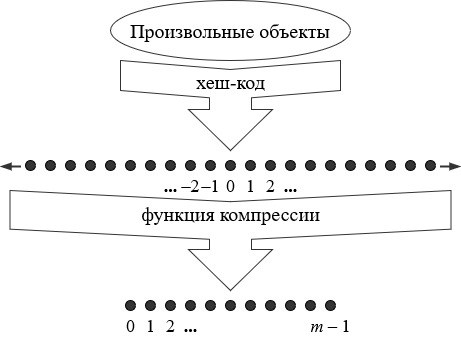

*Рисунок 3 — Схема построения хеш-функции на базе двух шагов*

На первом этапе (hash code) выполняется преобразование ключа в целое число. Если ключ уже представлен в числовом виде, то хеш-код может совпадать с самим ключом. Однако в более сложных случаях, например, при работе со строками, графами или другими объектами, хеш-код вычисляется с помощью специальных функций, извлекающих числовое представление из структурированных данных. При этом основное требование к хеш-коду — согласованность: для одного и того же ключа всегда должен возвращаться один и тот же хеш-код.

На втором этапе (compression) хеш-код преобразуется в значение из диапазона $[0, m - 1]$, где $m$ — размер хеш-таблицы. Это делается для того, чтобы хеш-значение можно было использовать как индекс массива. Функция компрессии должна быть детерминированной и равномерно распределять значения по диапазону, чтобы минимизировать вероятность коллизий. При этом одно и то же правило компрессии может применяться к разным хеш-кодам, в зависимости от текущего размера таблицы. Поэтому важно, чтобы компрессия была отделена от вычисления хеш-кода: это позволяет адаптироваться к изменению размеров таблицы без пересмотра всего алгоритма хеширования.

Разделение на два этапа удобно ещё и тем, что функции компрессии можно выбирать из числа простейших арифметических выражений, например, остатка от деления, а вычисление хеш-кода может быть реализовано сложным образом, соответствующим типу входных данных. В результате достигается универсальность: можно создавать хеш-функции для ключей произвольной природы и гибко управлять диапазоном значений.

Метод MAD, рассмотренный выше, может использоваться как на этапе вычисления хеш-кода, так и на этапе компрессии, поскольку удовлетворяет требованиям детерминированности и равномерного распределения значений. Благодаря этому, MAD оказывается универсальным средством построения хеш-функций как для числовых, так и для структурированных ключей.



---



**Полиномиальные хеш-функции** вводятся как способ устранения недостатков, связанных с простыми методами суммирования значений символов строки. Ранее был рассмотрен пример, в котором строки `stop`, `tops`, `post` и `spot` давали одинаковое значение хеш-кода при суммировании `ord()`-значений всех символов, несмотря на различие в порядке символов. Это связано с тем, что такой подход не учитывает позицию символа внутри строки. Он лишь фиксирует общий состав, а не структуру последовательности. Подобное поведение может привести к множественным коллизиям при использовании хеш-таблицы.

Для устранения этой проблемы применяется полиномиальный хеш-код — способ, в котором каждый символ строки интерпретируется как коэффициент одночлена, а вся строка — как значение многочлена, вычисленного в некоторой фиксированной точке $a$. Формально, если строка представлена как последовательность значений $(x_0, x_1, \ldots, x_{n-1})$, то полиномиальный хеш-код вычисляется по формуле:

$$
x_0 \cdot a^{n-1} + x_1 \cdot a^{n-2} + \cdots + x_{n-2} \cdot a + x_{n-1},
$$

где $a$ — целое число, фиксированная база полинома, обычно выбираемая из диапазона $a \geq 2$, и не равная $0$ или $1$. Такая форма записи делает хеш-функцию чувствительной к перестановке символов: даже незначительное изменение порядка приводит к совершенно иному значению хеш-кода.

Для практического применения этой формулы необходимо либо добавить функцию компрессии, чтобы перевести полученное значение в заданный диапазон $[0, m - 1]$, либо использовать вычисление по [схеме Горнера](https://ru.wikipedia.org/wiki/%D0%A1%D1%85%D0%B5%D0%BC%D0%B0_%D0%93%D0%BE%D1%80%D0%BD%D0%B5%D1%80%D0%B0). Эта схема упрощает расчёт полинома, позволяя избежать многократного возведения в степень. Выражение переписывается в форме:

$$
x_0 \cdot a^{n-1} + x_1 \cdot a^{n-2} + \cdots + x_{n-2} \cdot a + x_{n-1} = ((\cdots((x_0 \cdot a + x_1) \cdot a + x_2) \cdot a + \cdots) \cdot a + x_{n-1}),
$$

что даёт следующий алгоритм вычисления:

```python
res = 0
for x in input_data:
    res = a * res + x
```

Этот способ эффективен, так как использует только умножение и сложение, упрощая реализацию и ускоряя выполнение. Кроме того, он обеспечивает компактную и последовательную обработку входных данных.

Преимущество полиномиального хеш-кода особенно проявляется при работе со строками, состоящими из одинакового набора символов, но в разном порядке. Каждая позиция в строке влияет на результат, и благодаря этому можно избежать ситуаций, когда строка `stop` и `post` дают одинаковый хеш. Таким образом, используется не только состав, но и структура данных. Это делает полиномиальный хеш-код надёжным инструментом при построении хеш-функций, где важна устойчивость к коллизиям и учёт структуры входных данных.

### <font color='Teal'>Функция `hash` в Python

В языке Python **функция `hash()`** используется для получения хеш-кода объекта — целого числа, которое вычисляется на основе его содержимого и служит для быстрой идентификации объекта при работе со структурами данных. Хеш-коды важны при реализации хеш-таблиц, так как позволяют организовать быстрый доступ по ключу, минуя последовательный перебор элементов.

Функция `hash()` принимает единственный аргумент `x` и возвращает его хеш-код. Этот код является неизменным в течение жизни объекта, при условии, что сам объект не изменяется. Именно поэтому функция `hash()` применима только к объектам <u>неизменяемых типов</u>, которые в Python называются <u>хешируемыми</u>. К таким типам относятся целые и вещественные числа, строки, кортежи, содержащие исключительно хешируемые элементы, объект `None`, а также неизменяемые множества (`frozenset`).

Ниже показаны различные вызовы функции `hash()`:

In [ ]:
hash('Hello world!')

2271959769169686658

In [ ]:
hash(37)

37

In [ ]:
hash(3.141)

325123864299130883

In [ ]:
hash((1, 2))

-3550055125485641917

In [ ]:
hash(None)

605712

In [ ]:
hash(frozenset([1, 2]))

-1826646154956904602

Для всех перечисленных выше случаев возвращается уникальное целочисленное значение — хеш-код объекта. Эти значения могут использоваться, например, как индексы в хеш-таблице или для сравнения объектов в ассоциативных структурах.

Попытка вычислить хеш от изменяемого объекта, например, списка, приводит к ошибке. Это объясняется тем, что если бы хеш-код объекта можно было вычислить до его изменения, а затем изменить сам объект, это нарушило бы внутреннюю логику хеш-таблицы. Пример:

In [ ]:
try:
    print(hash([1, 2]))
except TypeError as e:
    print(f'Ошибка: {e}')

Ошибка: unhashable type: 'list'


Результатом будет сообщение TypeError: unhashable type: 'list', указывающее на то, что список не может быть использован в качестве хешируемого объекта.

Хешируемость объектов — важное условие при использовании их в качестве ключей словаря (`dict`) или элементов множества (`set`). Эти структуры полагаются на стабильность хеш-кода: для корректной работы он должен оставаться постоянным на протяжении всего времени существования объекта.

Функция `hash()` реализована в Python с учётом особенностей различных типов. Для встроенных числовых и строковых типов она обеспечивает быстрое и согласованное вычисление значения. В случае с пользовательскими классами поведение `hash()` может быть переопределено через метод `__hash__`, что позволяет управлять способом хеширования экземпляров, но при этом необходимо также обеспечить корректную реализацию метода `__eq__`, чтобы хеш-коды совпадали для объектов, считающихся равными.

Функция `hash()` играет важную роль не только при работе с базовыми типами данных, но и при определении поведения пользовательских объектов, особенно в контексте хеш-таблиц и структур данных, использующих хеши (например, `dict` и `set`). Одним из ключевых требований к реализации хеш-функций является соблюдение <u>согласованности между равенством объектов и их хеш-кодами</u>. Формально это означает следующее: если два объекта `x` и `y` считаются равными (`x == y`), то их хеш-коды также должны совпадать (`hash(x) == hash(y)`).

Это правило необходимо для обеспечения корректной работы хеш-таблиц, в которых используется сначала хеш-код, а затем проверка на равенство для поиска значения по ключу. Если два равных объекта будут иметь разные хеши, то доступ к элементу может быть нарушен, так как хеш-таблица начнёт искать его в другой ячейке.

Важно понимать, что обратное утверждение не является истинным: два различных объекта могут иметь одинаковый хеш-код. Это явление называется ***коллизией***. Коллизии неизбежны при конечном числе возможных хеш-значений и произвольном множестве входных объектов. Однако хорошая хеш-функция должна минимизировать вероятность таких совпадений.

Для иллюстрации принципа согласованности можно рассмотреть следующий пример:

In [ ]:
42 == 42.0

True

In [ ]:
hash(42)

42

In [ ]:
hash(42.0)

42

In [ ]:
hash(42.0000001)

230584303658

Здесь видно, что целое число `42` и число с плавающей точкой `42.0` считаются равными, и их хеш-коды совпадают. Это соответствует описанному правилу. Однако значение `42.0000001`, хотя и очень близкое, уже не равно `42.0`, и его хеш отличается. Это подтверждает, что хеш-функция учитывает точное значение объекта и возвращает одинаковый хеш только в случае строгого равенства.

Такое поведение позволяет использовать как целые числа, так и числа с плавающей точкой в качестве ключей в словарях и других структурах, основанных на хешировании, при условии, что они корректно реализуют метод `__eq__()` (для проверки равенства) и `__hash__()` (для получения хеш-кода).

В дополнение к встроенным типам, поддерживающим хеширование, в языке Python предусмотрена возможность переопределения поведения хеш-функции для пользовательских классов. Это делается с помощью метода `__hash__()`, который должен возвращать целочисленный хеш-код объекта. Чтобы обеспечить корректную работу объектов в хеш-таблицах, обязательно требуется реализовать также метод `__eq__()`, отвечающий за проверку равенства. Эти два метода должны быть <u>согласованы</u>: если два объекта считаются равными (то есть `x == y`), то и их хеш-коды должны совпадать (`hash(x) == hash(y)`).

Нарушение этого свойства приводит к ошибочному поведению при использовании объектов в структурах данных, например, `dict` и `set`, которые сначала вычисляют хеш, а затем сравнивают значения. Поэтому при проектировании хешируемых пользовательских классов следует учитывать не только внутреннее представление объекта, но и правила, по которым два экземпляра признаются равными.

Ниже приведён пример класса `Color`, моделирующего цвет в формате RGB. Каждый компонент цвета (`red`, `green`, `blue`) задаётся целым числом от 0 до 255, и все три компонента влияют на идентичность и хеш-код объекта.

In [ ]:
class Color:
    def __init__(self, r, g, b):
        assert type(r) is int
        assert 0 <= r <= 255
        self.__red = r

        assert type(g) is int
        assert 0 <= g <= 255
        self.__green = g

        assert type(b) is int
        assert 0 <= b <= 255
        self.__blue = b

    @property
    def red(self):
        return self.__red

    @property
    def green(self):
        return self.__green

    @property
    def blue(self):
        return self.__blue

    def __hash__(self):
        return hash((self.__red, self.__green, self.__blue))

    def __eq__(self, other):
        return (
            self.__red == other.red and
            self.__green == other.green and
            self.__blue == other.blue
        )

Конструктор класса принимает значения трёх компонент и проверяет, что каждое значение действительно является целым числом, а также находится в допустимых границах. Такие проверки реализуются через утверждения `assert`, что делает поведение класса устойчивым к некорректным входным данным и исключает возможность создания объекта с недопустимым состоянием. После прохождения проверок значения сохраняются во внутренние атрибуты `__red`, `__green` и `__blue`, к которым впоследствии обращаются только через свойства.

Свойства `red`, `green` и `blue` оформлены через декоратор `@property`, что обеспечивает доступ к компонентам цвета снаружи класса без прямого изменения этих значений. Это важный элемент инкапсуляции, при котором внутреннее состояние объекта остаётся защищённым, а интерфейс — удобным и предсказуемым.

Метод `__hash__()` переопределяет поведение встроенной функции `hash()` для объектов данного класса. Он возвращает хеш кортежа из трёх компонент цвета. Такой подход гарантирует, что при одинаковых значениях всех трёх компонент объекты будут иметь одинаковый хеш-код, а при различиях хотя бы в одном компоненте хеш-функция, с высокой вероятностью, даст другое значение. Это позволяет использовать объекты класса `Color` в качестве ключей в словарях и элементами в множествах.

Метод `__eq__()` определяет правило сравнения двух объектов. Возвращаемое значение `True` указывает на то, что значения всех трёх компонент совпадают. Сравнение реализуется не напрямую по закрытым атрибутам, а через свойства `red`, `green` и `blue` второго объекта, что подчёркивает правильное использование интерфейса класса даже внутри него самого. Совместное определение методов `__hash__()` и `__eq__()` обеспечивает согласованное поведение: если два объекта равны по значению, то их хеш-коды также совпадают, что необходимо для корректной работы хеш-таблиц.

Если создать два объекта `Color`, например, с компонентами `(2, 2, 115)`, то они будут логически равны, поскольку представляют один и тот же цвет:

In [ ]:
c1 = Color(2, 2, 115)
c2 = Color(2, 2, 115)

In [ ]:
c1 == c2

True

In [ ]:
hash(c1) == hash(c2)

True

Они не только равны по значению, но и имеют одинаковые хеш-коды, что важно при работе со структурами данных, основанными на хешировании. В этом случае объект `c2` воспринимается системой как эквивалент ключа `c1` и позволяет, например, извлекать данные из словаря по вновь созданному, но равному объекту:

In [ ]:
dc = dict()

In [ ]:
dc[c1] = 110

In [ ]:
dc[c2]

110

Несмотря на то, что `c2` создаётся отдельно, он распознаётся как совпадающий с `c1`, поскольку их хеши совпадают, и они считаются равными. Такое поведение возможно только при согласованной реализации методов `__hash__()` и `__eq__()`. Пример с классом `Color` наглядно демонстрирует, как за счёт хеширования по неизменяемым значениям и определения логического равенства по содержимому можно добиться корректной и предсказуемой работы пользовательских объектов в ассоциативных структурах Python.

Таким образом, функция `hash()` в Python представляет собой не просто инструмент для получения числового представления объекта, но важнейший механизм, лежащий в основе ассоциативного хранения данных. Её корректное поведение обеспечивает быстрый доступ и точное сопоставление элементов в структурах, использующих хеш-адресацию. Применительно к встроенным типам хеширование работает автоматически, но при проектировании пользовательских классов требуется явное определение логики сравнения и хеширования. Именно согласованная реализация методов `__eq__()` и `__hash__()` позволяет создавать объекты, способные надёжно участвовать в работе словарей и множеств, сохраняя логическую целостность и эффективность операций. Хеш-функция, построенная на неизменяемых значениях, и сравнение по содержанию обеспечивают предсказуемую и корректную интеграцию пользовательских объектов в хеш-таблицы, тем самым расширяя возможности языка для построения устойчивых и выразительных структур данных.

### <font color='Teal'>Методы разрешения коллизий

В хеш-таблицах коллизии неизбежны: различные ключи могут иметь одинаковые хеш-значения и попадать в одну ячейку. Для обработки таких ситуаций применяются специальные методы разрешения коллизий, каждый из которых определяет способ хранения и доступа к элементам с совпадающим хешем. Одним из таких подходов является **метод цепочек**.

Метод цепочек основан на идее хранения всех элементов, хешированных в одну и ту же ячейку, в виде <u>связанного списка</u>. Таким образом, каждая ячейка массива либо пуста (например, содержит значение `None`), либо содержит указатель на начало списка объектов, чьи хеш-значения совпадают. Такой подход сохраняет простоту доступа по хешу и обеспечивает расширяемость — в одну и ту же ячейку можно поместить произвольное количество значений, не изменяя структуру самой таблицы.

Рассмотрим конкретный пример, демонстрирующий работу метода цепочек. В качестве хеш-функции используется функция, возвращающая остаток от деления ключа `k` на `11`:

In [ ]:
def h(k):
    return k % 11

Список ключей:

In [ ]:
keys1 = [54, 26, 93, 17, 77, 31, 44, 20, 55]

Результаты применения хеш-функции `h(k)` к каждому ключу:

In [ ]:
[h(k) for k in keys1]

[10, 4, 5, 6, 0, 9]

Как видно из полученного списка хешей, ключи `77`, `44` и `55` отображаются в ячейку с индексом `0`, а ключи `31` и `20` — в ячейку `9`. Это приводит к возникновению коллизий. Метод цепочек позволяет корректно обработать такие случаи, добавляя значения в связный список внутри соответствующей ячейки. На рис. 4 представлено, как в результирующей таблице ячейка `0` указывает на начало списка `77 → 44 → 55`, а ячейка `9` — на список `31 → 20`. Все остальные ячейки содержат либо по одному элементу, либо остаются пустыми (`None`).

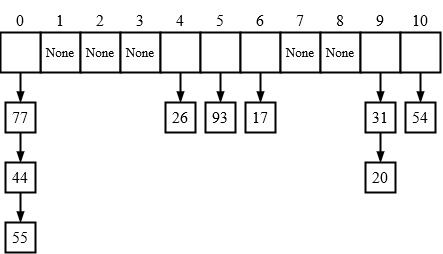

*Рисунок 4 — Хеш-таблица с разрешением коллизий методом цепочек*

Такой подход делает структуру таблицы динамически расширяемой: в каждую ячейку можно поместить столько элементов, сколько потребуется, при этом сохраняется общая логика хеш-адресации. Кроме того, время вставки нового элемента остаётся эффективным — в среднем оно составляет $O(1)$, если таблица сбалансирована и количество элементов в списках невелико. В наихудшем случае, когда все элементы попадают в одну ячейку, время вставки и поиска возрастает до $O(n)$, где $n$ — общее число элементов. Тем не менее, при хорошем выборе хеш-функции и разумном соотношении размера таблицы к числу элементов метод цепочек работает стабильно и быстро.

Удаление элемента также может быть выполнено за время, пропорциональное длине списка в ячейке. Для этого достаточно найти нужный элемент в связном списке, а затем изменить ссылки так, чтобы исключить его из структуры. Поддержка операций вставки, удаления и поиска делает метод цепочек универсальным и надёжным выбором для многих практических реализаций хеш-таблиц.

Реализация хеш-таблицы с методом цепочек может быть организована с помощью списка, каждая ячейка которого содержит отдельную цепочку — список пар вида (ключ, значение). В классической постановке цепочки представляют собой связанные списки, однако в языке Python естественно использовать встроенный тип `list`, который обеспечивает необходимую функциональность и удобочитаемость. При вставке новый элемент помещается в конец соответствующей цепочки, либо заменяет уже существующий, если такой ключ в списке уже присутствует.

Ниже приведён класс `HashTable`, реализующий подобное поведение:

In [ ]:
class HashTable:
    def __init__(self, size=11):
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        return key % self.size

    def insert(self, key, value):
        index = self._hash(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

    def get(self, key):
        index = self._hash(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        raise KeyError(f'Ключ {key} не найден')

    def delete(self, key):
        index = self._hash(key)
        for i, (k, _) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return
        raise KeyError(f'Ключ {key} не найден')

    def display(self):
        for index, chain in enumerate(self.table):
            if chain:
                entries = ' → '.join(f'{k}:{v}' for k, v in chain)
                print(f'{index}: {entries}')
            else:
                print(f'{index}: ∅')

Метод `__init__` принимает аргумент `size`, задающий количество ячеек в таблице, по умолчанию — `11`. В качестве структуры хранения используется список списков: `self.table` — это массив длины `size`, в каждой ячейке которого изначально находится пустой список. Именно этот список впоследствии будет использоваться в качестве цепочки. Таким образом, таблица создаётся заранее, но каждая цепочка наполняется по мере вставки элементов. Такая инициализация позволяет сразу задать фиксированное число ячеек и избежать перераспределения памяти на первом этапе.

Метод `_hash` реализует простейшую хеш-функцию — остаток от деления ключа на размер таблицы. Эта функция отображает ключ в допустимый диапазон индексов таблицы от `0` до `self.size - 1`. Она используется во всех основных операциях для определения ячейки, в которую должен быть помещён или из которой должен быть извлечён элемент.

Метод `insert` отвечает за добавление пары ключ–значение в таблицу. Сначала вычисляется хеш-значение ключа и определяется индекс цепочки. Затем происходит перебор всех пар в данной цепочке. Если среди них уже присутствует пара с тем же ключом, её значение заменяется на новое, а операция завершается. В противном случае в конец цепочки добавляется новая пара. Такое поведение обеспечивает корректную перезапись значения при повторной вставке того же ключа и поддерживает однозначное соответствие между ключами и значениями.

Метод `get` реализует поиск значения по ключу. По вычисленному индексу цепочки производится последовательный перебор всех пар. Если ключ совпадает с искомым, возвращается соответствующее значение. Если ни одна пара не удовлетворяет условию, возбуждается исключение `KeyError`. Это соответствует стандартному поведению словарей в Python, где отсутствие ключа в таблице считается ошибкой доступа.

Метод `delete` позволяет удалить элемент по ключу. Поиск осуществляется аналогично методу `get`: по хешу выбирается цепочка, затем выполняется последовательный просмотр. При нахождении совпадающего ключа соответствующая пара удаляется из списка. Если ключ в цепочке отсутствует, возбуждается исключение `KeyError`, сообщающее о невозможности удаления несуществующего элемента.

Для наглядного отображения содержимого таблицы может быть использован вспомогательный метод `display`. Он проходит по всем ячейкам таблицы и для каждой выводит либо символ пустоты, если цепочка пуста, либо последовательность пар ключ–значение, записанных через стрелку. Цепочки оформляются в читаемом виде: пары соединяются символом «→», а каждая строка начинается с номера соответствующей ячейки.

Для проверки работы структуры можно создать объект таблицы и добавить в неё последовательность пар ключ–значение, например, с теми же значениями ключей, что использовались ранее:

In [ ]:
ht = HashTable()

In [ ]:
for key, value in zip([54, 26, 93, 17, 77, 31, 44, 20, 55], 'abcdefghi'):
    ht.insert(key, value)

In [ ]:
ht.display()

0: 77:e → 44:g → 55:i
1: ∅
2: ∅
3: ∅
4: 26:b
5: 93:c
6: 17:d
7: ∅
8: ∅
9: 31:f → 20:h
10: 54:a


После добавления всех пар возможен вызов:

In [ ]:
ht.get(77)

'e'

Можно выполнить удаление элемента с этим ключом:

In [ ]:
ht.delete(77)

In [ ]:
ht.display()

0: 44:g → 55:i
1: ∅
2: ∅
3: ∅
4: 26:b
5: 93:c
6: 17:d
7: ∅
8: ∅
9: 31:f → 20:h
10: 54:a


После удаления вызов `ht.get(77)` приведёт к исключению, поскольку элемент больше не содержится в таблице. Повторная вставка элемента с тем же ключом приведёт к замещению значения, так как метод `insert` сначала проверяет наличие совпадающего ключа в цепочке и при необходимости обновляет соответствующую пару:

In [ ]:
ht.insert(77, 'новое значение')

In [ ]:
ht.display()

0: 44:g → 55:i → 77:новое значение
1: ∅
2: ∅
3: ∅
4: 26:b
5: 93:c
6: 17:d
7: ∅
8: ∅
9: 31:f → 20:h
10: 54:a


Таким образом, метод цепочек обеспечивает устойчивую работу хеш-таблицы при возникновении коллизий, позволяя хранить произвольное количество элементов в каждой ячейке без перераспределения массива. Все операции — вставка, поиск и удаление — выполняются в пределах локальной цепочки, что делает структуру гибкой и удобной в реализации. При умеренной загрузке и хорошей хеш-функции этот подход сохраняет высокую производительность и остаётся одним из наиболее надёжных способов организации ассоциативного хранения данных.



---



В другом подходе к размещению элементов — **методе открытой адресации** — все данные сохраняются непосредственно в ячейках основной таблицы. Каждая ячейка может содержать либо элемент множества, либо специальное значение, обозначающее пустую позицию (например, None или логический маркер). В случае коллизии новая позиция определяется по заданному правилу обхода, без привлечения внешних структур.

Поиск элемента в таблице с открытой адресацией осуществляется последовательной проверкой ячеек по определённой схеме. Начав с ячейки, соответствующей хеш-значению ключа, алгоритм проходит по таблице, переходя к следующей ячейке, если текущая либо пуста, либо содержит другой ключ. Процесс продолжается до тех пор, пока не будет найден искомый элемент или не будет достигнута пустая ячейка, что означает его отсутствие.

Одним из ограничений этого метода является то, что таблица может быть полностью заполнена — в отличие от метода цепочек, где количество элементов не ограничено фиксированным размером основного массива. Поэтому в методе открытой адресации критическим становится <u>коэффициент заполнения</u>, то есть отношение числа фактически размещённых элементов к общему числу ячеек. В такой таблице он не может превышать 1, поскольку каждый элемент занимает отдельную ячейку. При приближении коэффициента заполнения к единице производительность операций резко падает, а при полном заполнении вставка становится невозможной.

К достоинствам открытой адресации относится то, что разрешение коллизий происходит без дополнительных структур и указателей. Вместо этого вычисляется последовательность индексов, по которой осуществляется проверка. Это позволяет сэкономить память, а при большом размере таблицы и разумной стратегии обхода — сократить количество коллизий и ускорить доступ к данным. Метод открытой адресации, несмотря на свои ограничения, широко используется в практических реализациях хеш-таблиц, особенно в тех случаях, когда требуется хранение всех данных в одном массиве.

Вставка элемента при использовании метода открытой адресации осуществляется последовательным исследованием ячеек хеш-таблицы до тех пор, пока не будет найдена свободная позиция. В отличие от метода цепочек, где коллизии обрабатываются с помощью внешних структур, здесь все действия выполняются внутри таблицы. При возникновении коллизии предпринимается новая попытка с другим индексом, определяемым расширенной хеш-функцией, в которую включается номер текущей попытки вставки.

Для этого базовая хеш-функция дополняется вторым параметром — счётчиком попыток — и принимает вид $h(k, i)$, где $k$ — ключ, $i$ — номер шага, а возвращаемое значение — индекс ячейки таблицы. Функция должна быть организована так, чтобы вся таблица могла быть последовательно просмотрена: для любого $k$ последовательность $h(k, 0), h(k, 1), \dots, h(k, m - 1)$ должна быть перестановкой индексов от $0$ до $m - 1$. Это требование необходимо для гарантии завершения вставки при наличии хотя бы одной свободной ячейки.

Процесс вставки реализуется согласно следующему алгоритму. На первом шаге переменная $i$ инициализируется нулём. Затем на каждом шаге вычисляется индекс $j = h(k, i)$. Если ячейка с этим индексом свободна (например, содержит значение `None`), ключ записывается туда, и операция завершается. Если ячейка занята, значение $i$ увеличивается, и процедура повторяется. При достижении значения $i = m$ делается вывод, что таблица переполнена, так как не осталось доступных ячеек для вставки.

Аналогично строится алгоритм поиска элемента по ключу. Последовательно вычисляются значения $h(k, i)$ и проверяется содержимое соответствующих ячеек. Если найден элемент с совпадающим ключом, он возвращается. Если встречена пустая ячейка (`None`), делается вывод, что элемент в таблице отсутствует. Поиск продолжается до тех пор, пока не выполнено хотя бы одно из двух условий: либо найден нужный ключ, либо просмотрены все возможные позиции.

Удаление элемента при использовании метода открытой адресации требует особого подхода. Прямое удаление путём замены содержимого ячейки на `None` может привести к логической ошибке: при последующем поиске элемент с тем же хешем, вставленный позже, может быть пропущен из-за преждевременной остановки при встрече пустой ячейки. Чтобы избежать этой ситуации, применяется специальное значение-маркер `DELETED`, обозначающее логически удалённый, но технически занятый слот. При вставке такие ячейки считаются свободными, а при поиске — не приводят к остановке и не используются для заключения об отсутствии элемента.

Следует учитывать, что накопление пометок `DELETED` снижает эффективность работы таблицы. С ростом числа удалённых элементов увеличивается среднее число шагов, необходимых для поиска, что напрямую влияет на производительность. Для восстановления исходной эффективности периодически выполняется переупаковка таблицы, при которой элементы перехешируются и размещаются в новую структуру без промежуточных маркеров. Выбор конкретной стратегии удаления зависит от требований к производительности, допустимой сложности реализации и объёма доступной памяти.

Метод открытой адресации, несмотря на указанные сложности, остаётся надёжным и широко применяемым способом организации хеш-таблиц. Его эффективность в значительной степени определяется качеством хеш-функции и стратегией пробирования (линейное, квадратичное, двойное хеширование).

Рассмотрим пример реализации хеш-таблицы с методом открытой адресации, включающей операции вставки, поиска, удаления, а также метод `display`, позволяющий отобразить текущее состояние таблицы. Используется линейное пробирование как простейшая стратегия обхода (стратегии пробирования будут расмотрены ниже):

In [ ]:
class OpenAddressingHashTable:
    def __init__(self, size=11):
        self.size = size
        self.table = [None] * size
        self.DELETED = object()

    def _hash(self, key, i):
        return (key + i) % self.size

    def insert(self, key, value):
        for i in range(self.size):
            j = self._hash(key, i)
            if self.table[j] is None or self.table[j] is self.DELETED:
                self.table[j] = (key, value)
                return
            if self.table[j][0] == key:
                self.table[j] = (key, value)
                return
        raise Exception('Хеш-таблица переполнена')

    def get(self, key):
        for i in range(self.size):
            j = self._hash(key, i)
            if self.table[j] is None:
                break
            if self.table[j] is not self.DELETED and self.table[j][0] == key:
                return self.table[j][1]
        raise KeyError(f'Ключ {key} не найден')

    def delete(self, key):
        for i in range(self.size):
            j = self._hash(key, i)
            if self.table[j] is None:
                break
            if self.table[j] is not self.DELETED and self.table[j][0] == key:
                self.table[j] = self.DELETED
                return
        raise KeyError(f'Ключ {key} не найден')

    def display(self):
        for i, slot in enumerate(self.table):
            if slot is None:
                print(f'{i}: ∅')
            elif slot is self.DELETED:
                print(f'{i}: DEL')
            else:
                print(f'{i}: {slot[0]}:{slot[1]}')

Метод `__init__` принимает аргумент `size`, определяющий размер таблицы. По умолчанию используется значение `11`. Таблица инициализируется списком длины `size`, заполненным значениями `None`. Специальный объект `self.DELETED` используется как уникальный маркер для логически удалённых ячеек, чтобы их можно было отличать от действительно пустых. Эта мера необходима для корректной реализации поиска и повторной вставки.

Метод `_hash` реализует хеш-функцию с линейным пробированием: при каждой новой попытке вставки или поиска к начальному хеш-значению прибавляется номер текущей попытки $i$, а результат берётся по модулю от размера таблицы. Формально это соответствует выражению $h(k, i) = (k + i) \bmod m$. Такая стратегия обеспечивает просмотр всех ячеек таблицы в случае коллизий.

Метод `insert` выполняет вставку пары ключ–значение. Он перебирает значения $i$ от 0 до размера таблицы, вычисляя соответствующий индекс $j = h(k, i)$. Если в позиции $j$ находится пустая ячейка (`None`) или ранее удалённая (`DELETED`), то в неё помещается новая пара, и операция завершается. Если ячейка содержит элемент с тем же ключом, его значение заменяется. Если все ячейки оказались заняты, возбуждается исключение — таблица переполнена.

Метод `get` реализует поиск по ключу. Последовательно вычисляются индексы $h(k, i)$. Если на какой-либо итерации найдена пустая ячейка, делается вывод, что ключ отсутствует в таблице. Если найдена пара с совпадающим ключом, возвращается соответствующее значение. Если ячейка содержит маркер `DELETED`, поиск продолжается. Это поведение обеспечивает корректность при наличии удалённых элементов.

Метод `delete` организует логическое удаление элемента. Как и в случае поиска, последовательно проверяются ячейки. Если находится пара с нужным ключом, она заменяется маркером `DELETED`. Если ключ не найден, возбуждается исключение `KeyError`. Прямое удаление с установкой `None` не применяется, чтобы не нарушить корректность обхода при открытой адресации.

Метод `display` предназначен для визуального отображения текущего состояния таблицы. Каждая строка содержит индекс ячейки и её содержимое. Пустые ячейки обозначаются символом `∅`, удалённые — `DEL`, а занятые отображаются в виде пары `ключ:значение`. Такой вывод позволяет наглядно проследить структуру размещения элементов и последствия операций вставки и удаления.

Пример использования:

In [ ]:
ht = OpenAddressingHashTable()

In [ ]:
for key, value in zip([54, 26, 93, 17, 77, 31, 44, 20, 55], 'abcdefghi'):
    ht.insert(key, value)

In [ ]:
ht.display()

0: 77:e
1: 44:g
2: 20:h
3: 55:i
4: 26:b
5: 93:c
6: 17:d
7: ∅
8: ∅
9: 31:f
10: 54:a


In [ ]:
ht.delete(93)

In [ ]:
ht.display()

0: 77:e
1: 44:g
2: 20:h
3: 55:i
4: 26:b
5: DEL
6: 17:d
7: ∅
8: ∅
9: 31:f
10: 54:a


In [ ]:
ht.insert(88, 'f')

In [ ]:
ht.display()

0: 77:e
1: 44:g
2: 20:h
3: 55:i
4: 26:b
5: 88:f
6: 17:d
7: ∅
8: ∅
9: 31:f
10: 54:a


Этот код демонстрирует, как работает хеш-таблица с открытой адресацией при вставке, удалении и повторном использовании ячеек. При необходимости, можно реализовать <u>альтернативные</u> стратегии пробирования, изменяя определение метода `_hash`.

Таким образом, метод открытой адресации позволяет эффективно размещать элементы прямо в структуре таблицы, не прибегая к дополнительным указателям или внешним спискам. Он чувствителен к выбору хеш-функции и стратегии пробирования, так как именно они определяют порядок обхода ячеек при вставке, поиске и удалении. Для сохранения высокой производительности при росте числа элементов требуется не только контролировать коэффициент заполнения, но и тщательно подбирать способ обхода таблицы. Далее рассматриваются различные стратегии пробирования, определяющие, как именно формируется последовательность ячеек при разрешении коллизий.



---



Одной из базовых стратегий разрешения коллизий в рамках открытой адресации является **линейное пробирование**. Эта стратегия задаёт последовательный просмотр ячеек таблицы с постоянным шагом и используется при каждой новой попытке вставки, поиска или удаления элемента после возникновения коллизии.

В общем виде процесс пробирования в хеш-таблицах — это способ последовательного перебора ячеек таблицы с целью размещения нового элемента или поиска существующего при совпадении хеш-значений. При этом последовательность проверяемых индексов строится в зависимости от номера текущей попытки и параметров хеш-функции. В случае линейного пробирования используются равномерные шаги между ячейками, что обеспечивает простую и однозначную траекторию движения по таблице.

Пусть $h'(k)$ — исходная хеш-функция, сопоставляющая ключу $k$ значение из диапазона $\{0, 1, \dots, m - 1\}$, где $m$ — размер таблицы. Тогда при линейном пробировании итоговая хеш-функция определяется выражением:

$$
h(k, i) = (h'(k) + i) \bmod m,
$$

где $i$ — номер шага в процессе вставки или поиска. Эта формула означает, что при каждой новой попытке используется индекс, смещённый на $i$ позиций от исходного хеш-значения. Оператор взятия по модулю гарантирует, что все вычисленные индексы остаются в пределах допустимого диапазона и последовательность может быть замкнута.

Линейное пробирование интуитивно просто и обеспечивает полный просмотр таблицы при необходимости. Однако у этого метода есть важный недостаток, связанный с явлением <u>первичной кластеризации</u>. Оно заключается в том, что группы смежных заполненных ячеек имеют тенденцию к слиянию, образуя длинные последовательности занятых ячеек. Такие кластеры возникают потому, что любой новый элемент, сталкивающийся с заполненной ячейкой, будет помещён в ближайшую свободную, тем самым увеличивая размер группы. В результате при последующих вставках и поисках количество шагов увеличивается, а производительность таблицы снижается.

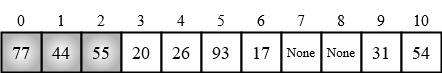

*Рисунок 5 — Хеш-таблица с открытой адресацией и линейным пробированием*

На рис. 5 представлена хеш-таблица с открытой адресацией и линейным пробированием, построенная на основе последовательности ключей `[54, 26, 93, 17, 77, 31, 44, 55, 20]` при использовании хеш-функции $h(k) = k \bmod 11$. При возникновении коллизии применяется линейное пробирование: последовательно проверяются ячейки таблицы до первой свободной. Например, ключ `77` хешируется в ячейку `0`, `44` — также в `0`, но занимает следующую свободную ячейку `1`, а `55` — ячейку `2`. Ключ `20` должен попасть в ячейку `9`, однако она занята, как и последующие `10`, `0`, `1`, `2`, поэтому `20` размещается лишь в ячейке `3`. Подобная последовательность смещений приводит к образованию группы смежных занятых ячеек — примера первичной кластеризации, характерного для линейного пробирования.

Для уменьшения первичной кластеризации, характерной для линейного пробирования, применяется **квадратичное пробирование**. В этой стратегии последовательность проверяемых ячеек формируется с квадратично возрастающим смещением, что позволяет более равномерно распределять элементы по таблице и снижать вероятность длительных последовательностей занятых позиций.

Для определения последовательности проверяемых ячеек применяется хеш-функция следующего вида:

$$
h(k, i) = \left(h'(k) + c_1 i + c_2 i^2\right) \bmod m,
$$

где $h'(k)$ — первичная хеш-функция, $c_1$ и $c_2$ — дополнительные целочисленные параметры, а $m$ — размер таблицы. Параметр $i$ принимает значения от $0$ до $m - 1$ и задаёт номер текущей попытки размещения элемента.

При этом первая проверяемая ячейка совпадает с $h'(k)$, а последующие вычисляются с учётом квадратичного смещения: $h'(k) + 1$, $h'(k) + 4$, $h'(k) + 9$, и т.д. (модулярно по $m$). Такой метод улучшает распределение значений по таблице, снижая вероятность образования длинных кластеров. Однако при неудачном выборе параметров $c_1$, $c_2$ и $m$ может случиться, что не все ячейки таблицы окажутся достижимыми, даже если в таблице есть свободные позиции. Поэтому важно выбирать значения этих параметров так, чтобы обеспечивалась перестановка всех индексов таблицы.

Достоинством квадратичного пробирования является более равномерное распределение ключей и уменьшение числа последовательных коллизий, особенно при заполнении значительной части таблицы. Однако этот метод сложнее в реализации и требует аккуратного подбора параметров, особенно в случае таблиц фиксированного размера.

Одной из наиболее универсальных стратегий пробирования является **двойное хеширование**, в котором для расчёта каждого следующего индекса используется вторая хеш-функция. Такой подход обеспечивает перестановку всех индексов таблицы и сводит к минимуму вероятность образования кластеров, особенно при высокой загрузке. В результате последовательность адресов имеет вид:

$$
h(k, i) = \left(h_1(k) + i \cdot h_2(k)\right) \bmod m,
$$

где $h_1(k)$ и $h_2(k)$ — две независимые хеш-функции. Вторая функция $h_2(k)$ должна быть таковой, чтобы гарантировать покрытие всех ячеек таблицы, то есть $h_2(k)$ и $m$ должны быть взаимно простыми. Это обеспечивает перестановку индексов таблицы и позволяет просматривать все позиции при возникновении коллизий.

Преимущество двойного хеширования заключается в том, что при правильном выборе хеш-функций достигается высокая степень равномерности распределения, близкая к идеальной. Такой подход снижает вероятность кластеризации и сохраняет эффективность даже при значительном заполнении таблицы. Двойное хеширование считается одной из наиболее универсальных стратегий пробирования при реализации хеш-таблиц с открытой адресацией.

При реализации хеш-таблицы с открытой адресацией выше использовалась стратегия линейного пробирования. В этом случае в методе `_hash` при каждой новой попытке к начальному хеш-значению прибавлялось значение счётчика $i$, что реализует стратегию линейного пробирования — последовательного смещения на один шаг. Этот подход прост, но подвержен эффекту первичной кластеризации. Рассмотрим примеры реализации методов хеширования, соответствующих другим стратегиям (квадратичному пробированию и двойному хешированию), которые могут быть использованы в классе хеш-таблицы в качестве альтернатив `_hash`.

Для квадратичного пробирования можно использовать следующую реализацию метода хеширования:

```python
def _hash(self, key, i):
    c1, c2 = 1, 3
    return (hash(key) + c1 * i + c2 * i * i) % self.size
```

Здесь используются две целочисленные константы `c1` и `c2`, которые определяют форму квадратичного смещения. Выбор значений влияет на покрытие индексов таблицы. Для обеспечения корректности следует удостовериться, что при любом `key` и `0 ≤ i < size` функция `_hash` даёт возможность обойти все ячейки, если это потребуется.

Для двойного хеширования метод `_hash` принимает следующий вид:

```python
def _hash(self, key, i):
    h1 = hash(key) % self.size
    h2 = 1 + (hash(key) % (self.size - 1))
    return (h1 + i * h2) % self.size
```

Здесь `h1` — первичная хеш-функция, `h2` — вторая функция, определяющая шаг обхода. Использование $h_2(k) = 1 + (k \bmod (m - 1))$ гарантирует, что значение шага всегда положительно и взаимно просто с размером таблицы (при $m$ — простом числе), что необходимо для полного покрытия таблицы. Эта реализация обеспечивает перестановку индексов таблицы и демонстрирует ключевое преимущество двойного хеширования — равномерное распределение даже при высоком коэффициенте заполнения.

Выбор конкретной стратегии пробирования может быть реализован через изменение метода `_hash`, сохраняя остальную структуру класса без изменений. Это позволяет гибко адаптировать поведение хеш-таблицы в зависимости от требований к производительности и устойчивости к кластеризации.

В конечном итоге производительность хеш-таблицы напрямую зависит от способа разрешения коллизий, который определяет поведение всех операций в условиях плотного заполнения. Метод цепочек сохраняет гибкость за счёт внешних списков, метод открытой адресации требует точного управления стратегией пробирования. Линейный, квадратичный и двойной обход определяют, насколько устойчива таблица к кластеризации и как равномерно будут распределены элементы. Эффективная реализация достигается согласованным выбором хеш-функции, стратегии обхода и контролем за загрузкой таблицы.

### <font color='Teal'>Примеры решения задач

Практическое применение хеш-таблиц охватывает широкий круг задач, связанных с эффективным хранением и быстрым доступом к объектам по ключу. Ниже приводятся примеры, иллюстрирующие использование пользовательских структур и реализацию хеш-таблиц с различными стратегиями разрешения коллизий. Каждый пример строится вокруг типовой задачи: создание классов, организация хеш-таблицы, выполнение основных операций и интерпретация результата.

**Пример 1.** Создать класс «Животное» с полями «Вид», «Кличка», «Пол» и «Возраст». Создать хеш-таблицу для хранения объектов класса «Животное» по ключу — номеру чипа.

**Решение.** Для хранения данных о животных используется пользовательский класс `Animal`, а связанная с ним хеш-таблица реализуется с помощью метода цепочек. В качестве ключей используется уникальный номер чипа, а значениями являются экземпляры класса. Таблица позволяет добавлять, удалять и извлекать объекты по ключу.

In [ ]:
class Animal:
    def __init__(self, species, name, gender, age):
        self.species = species
        self.name = name
        self.gender = gender
        self.age = age

    def __str__(self):
        return (f"Кличка: {self.name} ({self.species}), "
                f"пол: {self.gender}, возраст: {self.age}")

Класс `Animal` описывает объект-животное с четырьмя основными полями: вид животного (`species`), кличка (`name`), пол (`gender`) и возраст (`age`). Метод `__str__` переопределён для удобного текстового представления объекта.

Класс `HashTable` реализует хеш-таблицу с методом цепочек для разрешения коллизий. Его основное назначение — эффективное хранение и доступ к элементам по заданному ключу, в данном случае — по уникальному номеру чипа животного. Класс поддерживает основные операции, необходимые для работы с ассоциативной структурой: вставку, удаление, поиск и визуализацию.

In [ ]:
class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [[] for _ in range(self.size)]

    def _hash(self, chip_number):
        return hash(str(chip_number)) % self.size

    def add(self, chip_number, animal):
        index = self._hash(chip_number)
        for item in self.table[index]:
            if item[0] == chip_number:
                item[1] = animal
                return
        self.table[index].append([chip_number, animal])

    def remove(self, chip_number):
        index = self._hash(chip_number)
        for i, item in enumerate(self.table[index]):
            if item[0] == chip_number:
                del self.table[index][i]
                return

    def get(self, chip_number):
        index = self._hash(chip_number)
        for item in self.table[index]:
            if item[0] == chip_number:
                return item[1]
        return None

    def display(self):
        for i, chain in enumerate(self.table):
            if chain:
                entries = ' → '.join(f'{key}: {value.name}' for key, value in chain)
                print(f'{i}: {entries}')
            else:
                print(f'{i}: ∅')

Конструктор `__init__` принимает необязательный параметр `size`, задающий количество ячеек в таблице (по умолчанию — 10). Каждая ячейка инициализируется пустым списком, представляющим цепочку, в которой будут храниться пары ключ–значение. В результате `self.table` становится списком списков, где каждая внутренняя структура представляет собой цепочку для разрешения коллизий.

Метод `_hash` определяет хеш-функцию, преобразующую ключ `chip_number` в индекс таблицы. Для этого ключ сначала приводится к строке, чтобы обеспечить одинаковое поведение при использовании различных числовых типов (например, `int` и `str`). Далее применяется встроенная функция `hash`, и результат берётся по модулю `self.size`, чтобы получить допустимый индекс.

Метод `add` добавляет элемент в таблицу. Сначала вычисляется индекс хеш-таблицы по номеру чипа, затем просматривается соответствующая цепочка. Если ключ уже присутствует, значение обновляется (то есть происходит замена объекта `animal` на новый). Если ключ отсутствует, пара `[chip_number, animal]` добавляется в конец цепочки.

Метод `remove` отвечает за удаление элемента по ключу. По вычисленному индексу происходит перебор всех элементов в цепочке. При совпадении ключа соответствующий элемент удаляется из цепочки с помощью `del`. Если элемент не найден, никаких действий не происходит.

Метод `get` реализует доступ к элементу по ключу. Вычисляется индекс таблицы и производится перебор цепочки в этой ячейке. Если найден элемент с совпадающим ключом, возвращается связанный с ним объект (в рассматриваемом примере — объект класса `Animal`). Если элемент не найден, возвращается `None`, что позволяет использовать метод в условных выражениях для проверки наличия ключа.

Метод `display` выводит текущее состояние таблицы. Каждая строка начинается с номера ячейки, после чего следует либо символ `∅`, если цепочка пуста, либо последовательность пар `ключ:имя`, соединённых символом `→`.

Создаётся объект таблицы и список животных:

In [ ]:
animals = HashTable()

In [ ]:
list_of_animals = [
    Animal("собака", "Рекс", "муж.", 5),
    Animal("кошка", "Матильда", "жен.", 7),
    Animal("собака", "Белла", "жен.", 3),
    Animal("хомяк", "Кузьма", "муж.", 1),
    Animal("попугай", "Раджа", "муж.", 2)
    ]

In [ ]:
for animal in list_of_animals:
    print(animal)

Кличка: Рекс (собака), пол: муж., возраст: 5
Кличка: Матильда (кошка), пол: жен., возраст: 7
Кличка: Белла (собака), пол: жен., возраст: 3
Кличка: Кузьма (хомяк), пол: муж., возраст: 1
Кличка: Раджа (попугай), пол: муж., возраст: 2


Животным присваиваются случайные номера чипов, и они добавляются в таблицу. Одновременно отображаются соответствия ключей:

In [ ]:
import random

In [ ]:
chip_ids = []

In [ ]:
print('Номера чипов:')
for animal in list_of_animals:
    chip_number = random.randint(100000000, 999999999)
    chip_ids.append(chip_number)
    print(f'{chip_number} — {animal.name}')
    animals.add(chip_number, animal)

Номера чипов:
622253200 — Рекс
895335047 — Матильда
333187080 — Белла
591555609 — Кузьма
654130903 — Раджа


Вывод содержимого таблицы позволяет визуально оценить размещение элементов по ячейкам и увидеть цепочки:

In [ ]:
print('Состояние хеш-таблицы после вставки:')
animals.display()

Состояние хеш-таблицы после вставки:
0: 622253200: Рекс → 591555609: Кузьма
1: 654130903: Раджа
2: ∅
3: ∅
4: ∅
5: 895335047: Матильда
6: ∅
7: ∅
8: 333187080: Белла
9: ∅


Далее осуществляется поиск двух животных по их номерам чипов:

In [ ]:
print('Поиск по номеру чипа:')
print(animals.get(chip_ids[0]))
print(animals.get(chip_ids[1]))

Поиск по номеру чипа:
Кличка: Рекс (собака), пол: муж., возраст: 5
Кличка: Матильда (кошка), пол: жен., возраст: 7


Один из объектов удаляется:

In [ ]:
animals.remove(chip_ids[1])

Повторная проверка убеждается, что животное удалено:

In [ ]:
result = animals.get(chip_ids[1])

In [ ]:
print(result if result else "Животного с данным номером чипа нет в хеш-таблице")

Животного с данным номером чипа нет в хеш-таблице


А таблица визуализируется повторно:

In [ ]:
print('Состояние хеш-таблицы после удаления:')
animals.display()

Состояние хеш-таблицы после удаления:
0: 622253200: Рекс → 591555609: Кузьма
1: 654130903: Раджа
2: ∅
3: ∅
4: ∅
5: ∅
6: ∅
7: ∅
8: 333187080: Белла
9: ∅


Пример демонстрирует полную реализацию хеш-таблицы с методом цепочек для хранения информации о животных. Использование номеров чипов в качестве ключей обеспечивает уникальность доступа. Добавление, удаление и извлечение элементов выполняются эффективно, а метод `display` делает структуру наглядной.



---



**Пример 2.** Для анализа данных, хранящихся в хеш-таблице, часто требуется определить статистически значимую информацию, например, наиболее часто встречающееся значение по определённому признаку. В контексте примера с животными, занесёнными в таблицу по номеру чипа, интерес может представлять определение того, какой вид животных встречается чаще всего.

**Решение.** Для решения такой задачи вводится функция `most_common_species`, которая перебирает все элементы таблицы и ведёт подсчёт частоты встречаемости значений по полю `species`, то есть определяет, к какому виду относится каждое животное. Функция реализует словарь `species_count`, в котором ключами являются виды, а значениями — число их вхождений в таблицу. После прохождения всей таблицы из словаря извлекается ключ с максимальным значением — это и будет наиболее часто встречающийся вид.

In [ ]:
def most_common_species(hash_table):
    species_count = {}
    for slot in hash_table.table:
        for _, animal in slot:
            if animal.species in species_count:
                species_count[animal.species] += 1
            else:
                species_count[animal.species] = 1
    return max(species_count, key=species_count.get)

Для каждого объекта `animal` извлекается значение поля `species`. Далее происходит обновление счётчика в словаре `species_count`: если вид уже присутствует в словаре, значение увеличивается на `1`; если нет — инициализируется с нуля. Использование словаря позволяет реализовать эффективный подсчёт за время, пропорциональное числу элементов в таблице. По завершении используется функция `max` с ключом `species_count.get`, что позволяет получить тот вид, который встречается чаще всего.

Теперь продемонстрируем применение этой функции к ранее созданной таблице `animals`, в которую были занесены несколько объектов класса `Animal`. Таблица уже содержит данные, и остаётся только вызвать функцию и вывести результат:

In [ ]:
print(f'Наиболее часто в хеш-таблице встречается '
      f'вид: {most_common_species(animals)}')

Наиболее часто в хеш-таблице встречается вид: собака


В результате выполнения будет выведено название вида, который встречается среди животных чаще остальных. Данный пример показывает, как на базе уже построенной хеш-таблицы можно выполнять аналитические запросы, не изменяя её структуру и не нарушая принципов инкапсуляции. Подход может быть расширен и адаптирован для других задач статистической обработки данных, например, поиска максимального или минимального значения, фильтрации по условиям, группировки и т.д.



---



**Пример 3.** Реализовать хеш-таблицу для хранения информации о пользователях системы. Ключом является логин пользователя, значением — объект, содержащий сведения о пользователе (имя, фамилия, пароль, права доступа и т.д.). Использовать метод разрешения коллизий методом открытой адресации с двойным хешированием и реализовать возможность добавления, удаления и изменения информации о пользователях.

**Решение.** Для представления информации о пользователях вводится класс `User`, содержащий ключевые поля, необходимые в информационных системах. Хеш-таблица реализуется в виде массива фиксированного размера, где элементы располагаются непосредственно внутри таблицы. Для разрешения коллизий используется двойное хеширование: при совпадении хеш-значений используется дополнительная хеш-функция, определяющая шаг обхода.

In [ ]:
class User:
    def __init__(self, name, login, password, access_rights):
        self.name = name
        self.login = login
        self.password = password
        self.access_rights = access_rights

    def __str__(self):
        return (f'user: {self.name}\n'
                f'login: {self.login}\n'
                f'password: {self.password}\n'
                f'access_rights: {self.access_rights}')

ласс `User` содержит четыре поля: имя пользователя, логин, пароль и уровень доступа. Метод `__str__` возвращает удобочитаемое представление объекта и используется при выводе данных на экран.

Следующий класс реализует хеш-таблицу с открытой адресацией. В основе лежит два массива — `keys` и `values`, каждый из которых имеет длину `size`. При вставке и поиске используется пара хеш-функций: первая определяет начальное положение, а вторая — шаг при возникновении коллизии.

In [ ]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.keys = [None] * self.size
        self.values = [None] * self.size

    def hash_function(self, key):
        return hash(key) % self.size

    def double_hash_function(self, key):
        return 1 + (hash(key) % (self.size - 2))

    def add(self, key, value):
        hash_value = self.hash_function(key)
        if self.keys[hash_value] is None:
            self.keys[hash_value] = key
            self.values[hash_value] = value
        elif self.keys[hash_value] == key:
            self.values[hash_value] = value
        else:
            i = 1
            while True:
                new_hash_value = (hash_value + i * self.double_hash_function(key)) % self.size
                if self.keys[new_hash_value] is None:
                    self.keys[new_hash_value] = key
                    self.values[new_hash_value] = value
                    break
                elif self.keys[new_hash_value] == key:
                    self.values[new_hash_value] = value
                    break
                else:
                    i += 1

    def get(self, key):
        hash_value = self.hash_function(key)
        if self.keys[hash_value] == key:
            return self.values[hash_value]
        else:
            i = 1
            while True:
                new_hash_value = (hash_value + i * self.double_hash_function(key)) % self.size
                if self.keys[new_hash_value] == key:
                    return self.values[new_hash_value]
                elif self.keys[new_hash_value] is None:
                    return None
                else:
                    i += 1

    def remove(self, key):
        hash_value = self.hash_function(key)
        if self.keys[hash_value] == key:
            self.keys[hash_value] = None
            self.values[hash_value] = None
        else:
            i = 1
            while True:
                new_hash_value = (hash_value + i * self.double_hash_function(key)) % self.size
                if self.keys[new_hash_value] == key:
                    self.keys[new_hash_value] = None
                    self.values[new_hash_value] = None
                    break
                elif self.keys[new_hash_value] is None:
                    break
                else:
                    i += 1

    def display(self):
        for i in range(self.size):
            if self.keys[i] is None:
                print(f'{i}: ∅')
            else:
                print(f'{i}: {self.keys[i]} → {self.values[i].access_rights}')

Конструктор `__init__` принимает обязательный параметр `size`, задающий количество ячеек в таблице. Инициализируются два массива длины `size`: `self.keys` — для хранения ключей, и `self.values` — для хранения соответствующих значений. Все элементы этих массивов изначально заполнены значением `None`, что означает, что таблица пуста.

Метод `hash_function` реализует первичную хеш-функцию, которая преобразует строковый или числовой ключ в индекс ячейки. Для этого используется встроенная функция `hash`, а затем результат приводится к диапазону допустимых индексов с помощью операции взятия остатка по модулю `self.size`.

Метод `double_hash_function` задаёт вторичную хеш-функцию, используемую при двойном хешировании для определения шага между проверяемыми ячейками при коллизии. Значение шага вычисляется так, чтобы оно всегда было положительным и не делилось на размер таблицы. Это условие гарантирует, что при вставке или поиске можно обойти все ячейки таблицы, если в ней остались свободные позиции. Формула корректно работает при условии, что размер таблицы — простое число.

Метод `add` реализует вставку пары ключ–значение. Сначала определяется начальная позиция `hash_value` с помощью первичной хеш-функции. Если ячейка пуста или содержит тот же ключ, туда помещается новая пара или происходит обновление значения. В противном случае происходит последовательный просмотр таблицы по формуле двойного хеширования до нахождения либо свободной ячейки, либо ячейки с совпадающим ключом, в которую значение обновляется.

Метод `get` осуществляет поиск значения по заданному ключу. Начальная позиция определяется по первичной хеш-функции. Если в этой ячейке находится нужный ключ, возвращается соответствующее значение. Если нет — происходит последовательный просмотр таблицы по формуле двойного хеширования до тех пор, пока не будет найден нужный ключ или не встретится пустая ячейка, что означает отсутствие ключа в таблице.

Метод `remove` реализует удаление элемента по ключу. Сначала проверяется ячейка, соответствующая значению первичной хеш-функции. Если она содержит искомый ключ — ключ и значение обнуляются. В противном случае используется стратегия двойного хеширования для последовательного просмотра. Если в процессе найден нужный ключ, он удаляется. Если встречается пустая ячейка, поиск завершается — элемент отсутствует.

Метод `display` предназначен для визуального отображения текущего состояния таблицы. Для каждой ячейки выводится её индекс и либо символ `∅`, если ячейка пуста, либо пара `ключ → права`, где `права` — это значение поля `access_rights` объекта, связанного с данным ключом.

Создаётся список объектов класса `User` и таблица на 17 элементов:

In [ ]:
users = HashTable(17)

In [ ]:
list_of_users = [
    User("Александр Иванов", "alex_ivanov", "password123", "admin"),
    User("Екатерина Петрова", "kate_petrova", "secret321", "user"),
    User("Дмитрий Сидоров", "dima_sidorov", "qwerty", "user"),
    User("Анна Кузнецова", "anna_kuznetsova", "password", "admin"),
    User("Илья Шевченко", "ilya_shevchenko", "letmein", "user"),
    User("Наталья Ковалева", "natalia_kovaleva", "pastry123", "user"),
    User("Максим Федоров", "max_fedorov", "123456", "user"),
    User("Ольга Макарова", "olga_makarova", "password123", "admin"),
    User("Артем Григорьев", "artem_grigorev", "password123", "user"),
    User("Мария Смирнова", "maria_smirnova", "ilovecats", "user")
    ]

Добавим пользователей в таблицу. При этом автоматически разрешаются возможные коллизии.

In [ ]:
for user in list_of_users:
    users.add(user.login, user)

Проверим содержимое таблицы после добавления данных:

In [ ]:
print('Состояние таблицы после вставки:')
users.display()

Состояние таблицы после вставки:
0: ∅
1: max_fedorov → user
2: maria_smirnova → user
3: kate_petrova → user
4: dima_sidorov → user
5: ∅
6: alex_ivanov → superadmin
7: artem_grigorev → user
8: ilya_shevchenko → user
9: anna_kuznetsova → admin
10: ∅
11: ∅
12: olga_makarova → admin
13: natalia_kovaleva → user
14: ∅
15: ∅
16: ∅


Произведём доступ к информации по ключу:

In [ ]:
print('Получение информации по логину:')
user_info = users.get("alex_ivanov")
print(user_info)

Получение информации по логину:
user: Александр Иванов
login: alex_ivanov
password: password123
access_rights: superadmin


Изменим права доступа выбранного пользователя:

In [ ]:
user_info.access_rights = "superadmin"
print('Обновлённый пользователь:')
print(user_info)

Обновлённый пользователь:
user: Александр Иванов
login: alex_ivanov
password: password123
access_rights: superadmin


In [ ]:
users.add(user_info.login, user_info)

Удалим одного из пользователей из таблицы:

In [ ]:
users.remove("maria_smirnova")

Проверим, что пользователь действительно удалён:

In [ ]:
result = users.get("maria_smirnova")

In [ ]:
print(result if result else "Такого пользователя нет в хеш-таблице")

Такого пользователя нет в хеш-таблице


И, наконец, отобразим таблицу после изменений:

In [ ]:
print('Состояние таблицы после удаления:')
users.display()

Состояние таблицы после удаления:
0: ∅
1: max_fedorov → user
2: ∅
3: kate_petrova → user
4: dima_sidorov → user
5: ∅
6: alex_ivanov → superadmin
7: artem_grigorev → user
8: ilya_shevchenko → user
9: anna_kuznetsova → admin
10: ∅
11: ∅
12: olga_makarova → admin
13: natalia_kovaleva → user
14: ∅
15: ∅
16: ∅


В данном примере реализована хеш-таблица с методом открытой адресации и двойным хешированием для хранения информации о пользователях. Двойное хеширование обеспечивает надёжное разрешение коллизий за счёт гибкой схемы обхода. Структура позволяет эффективно выполнять основные операции: добавление, обновление, поиск и удаление, сохраняя данные непосредственно в массиве таблицы.